In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd


In [3]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
 
files = ["Salary_Data.csv", "insurance.csv"]

In [5]:
column_names = [["years", "salary"], ["age", "sex", "bmi", "children", "smoker", "region", "charges"]]

In [6]:
for i in range(len(files)):
    if i == 0:
        print("Dataset des salaires")
    else:
        print(" Dataset d'assurance ")

    df = pd.read_csv(files[i], names=column_names[i])
    print(df.head())

Dataset des salaires
             years    salary
0  YearsExperience    Salary
1              1.1  39343.00
2              1.3  46205.00
3              1.5  37731.00
4              2.0  43525.00
 Dataset d'assurance 
   age     sex     bmi  children  smoker     region      charges
0  age     sex     bmi  children  smoker     region      charges
1   19  female    27.9         0     yes  southwest    16884.924
2   18    male   33.77         1      no  southeast    1725.5523
3   28    male      33         3      no  southeast     4449.462
4   33    male  22.705         0      no  northwest  21984.47061


In [7]:
#2

In [8]:
column_names = [["years", "salary"], ["age", "sex", "bmi", "children", "smoker", "region", "charges"]]

In [9]:
for i in range(len(files)):
    if i == 0:
        print("Dataset des salaires")
    else:
        print("Dataset d'assurance")

    df = pd.read_csv(files[i], names=column_names[i])

    print("  Sans transformation des données --- ")
    print(df.describe())

    print("   Avec transformation des données --- ")
    df = df.apply(pd.to_numeric, errors='coerce')
    print(df.describe())

Dataset des salaires
  Sans transformation des données --- 
       years  salary
count     31      31
unique    29      31
top      3.2  Salary
freq       2       1
   Avec transformation des données --- 
           years         salary
count  30.000000      30.000000
mean    5.313333   76003.000000
std     2.837888   27414.429785
min     1.100000   37731.000000
25%     3.200000   56720.750000
50%     4.700000   65237.000000
75%     7.700000  100544.750000
max    10.500000  122391.000000
Dataset d'assurance
  Sans transformation des données --- 
         age   sex   bmi children smoker     region    charges
count   1339  1339  1339     1339   1339       1339       1339
unique    48     3   549        7      3          5       1338
top       18  male  32.3        0     no  southeast  1639.5631
freq      69   676    13      574   1064        364          2
   Avec transformation des données --- 
               age  sex          bmi     children  smoker  region  \
count  1338.000000  0.0 

In [11]:
#3

In [12]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import matplotlib.pyplot as plt

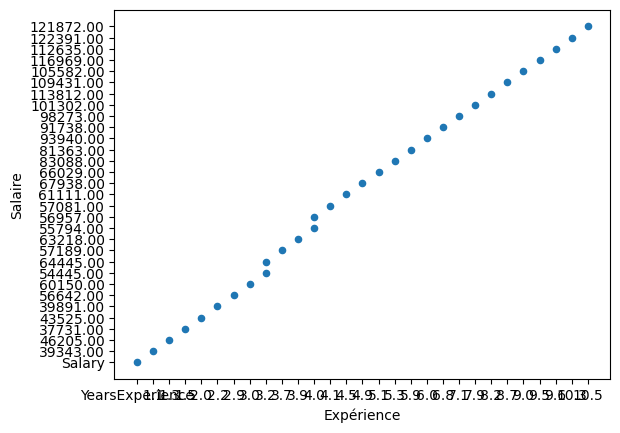

In [14]:
df = pd.read_csv(files[0], names=column_names[0])
df = df.rename(columns={"years": "experience", "salary": "salaire"})

df.plot.scatter(x="experience", y="salaire")
plt.xlabel("Expérience")
plt.ylabel("Salaire")
plt.show()

In [15]:
#4
file_path = "insurance.csv"
features = ["age", "sex", "bmi", "children", "smoker", "region", "charges"]

In [16]:
df = pd.read_csv(file_path, names=features)

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [19]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "./insurance.csv"
features = ["age","sex","bmi","children","smoker","region","charges"]
df = pd.read_csv(file_path, names=features)

# Convert columns to appropriate dtypes
df = df.convert_dtypes()

# Selecting only numeric columns
numeric_features = ["age","bmi","children","charges"]

# Creating a pairplot using Seaborn
sns.pairplot(df[numeric_features])
plt.show()





#Partie 2 « Régression Simple cas Expérience Salaire »:

ValueError: No variables found for grid columns.

In [21]:
#1

In [22]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
import pandas as pd

In [25]:
file_paths = ["Salary_Data.csv", "insurance.csv"]

              salary
count      30.000000
mean    76003.000000
std     27414.429785
min     37731.000000
25%     56720.750000
50%     65237.000000
75%    100544.750000
max    122391.000000


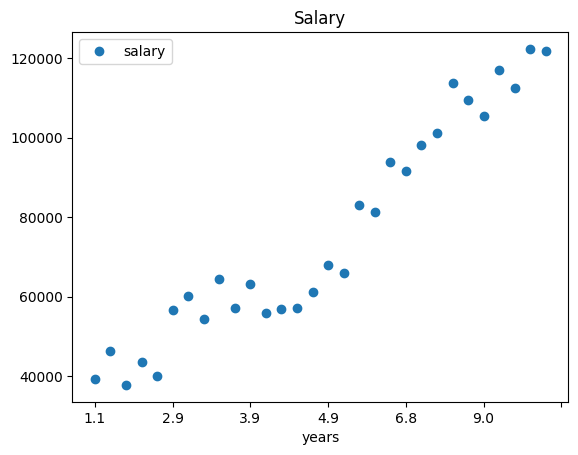

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = ["Salary_Data.csv"]
col_names = [["years", "salary"]]

f = 0
df = pd.read_csv(file_paths[f], names=col_names[f])

# Convert 'salary' column to numeric, coercing errors to NaN
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

# Remove rows with NaN values in the 'salary' column
df = df.dropna(subset=['salary'])

print(df.describe())

x = df['years'].values.reshape(-1, 1)
y = df['salary'].values.reshape(-1, 1)

df.plot(x="years", y="salary", style="o")
plt.title("Salary")

plt.show()

In [27]:
x = df['years'].values.reshape(-1, 1)
y = df['salary'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("b0 (intercept) = " + str(regressor.intercept_[0]))
print("b1 (coefficient) = " + str(regressor.coef_[0][0]))

b0 (intercept) = 26780.09915062818
b1 (coefficient) = 9312.575126729189


In [28]:
#2
y_p = regressor.predict(x_test)
result = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': y_p.flatten()})
print(result)

   Actual Values  Predicted Values
0        37731.0      40748.961841
1       122391.0     122699.622956
2        57081.0      64961.657170
3        63218.0      63099.142145
4       116969.0     115249.562855
5       109431.0     107799.502753


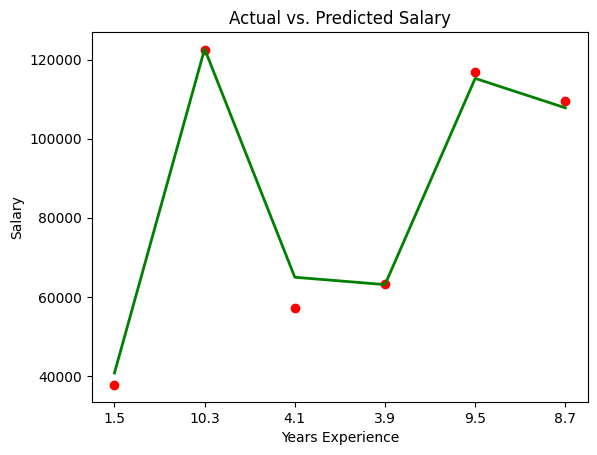

In [29]:
#3
plt.scatter(x_test.flatten(), y_test.flatten(), color="red")
plt.plot(x_test.flatten(), y_p.flatten(), color="green", linewidth=2)
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Actual vs. Predicted Salary")
plt.show()

In [33]:

#4
MAR = metrics.mean_absolute_error(y_test, y_p)
MSR = metrics.mean_squared_error(y_test, y_p)
RMSR = np.sqrt(MSR)

print("Mean Absolute Error:", MAR)
print("Mean Squared Error:", MSR)
print("Root Mean Squared Error:", RMSR)


Mean Absolute Error: 2446.1723690465055
Mean Squared Error: 12823412.298126549
Root Mean Squared Error: 3580.979237321343


In [34]:
#partie 3 « Régression multiple cas d’assurance »:
#1

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

file_paths = ["./Salary_Data.csv", "./insurance.csv"]
col_names = [["years", "salary"], ["age", "sex", "bmi", "children", "smoker", "region", "charges"]]

f = 1
df = pd.read_csv(file_paths[f], names=col_names[f], skiprows=1)

print(df.describe())

 
x = df[['age', 'bmi', 'children']].values
y = df['charges'].values

 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


LinearRegression()

In [36]:
#2

In [37]:
 
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

          Actual     Predicted
0     9724.53000  15837.629611
1     8547.69130  14487.653537
2    45702.02235  18706.162588
3    12950.07120  19600.798933
4     9644.25250  11334.387366
..           ...           ...
263  15019.76005  18790.825212
264   6664.68595  12876.924896
265  20709.02034  19285.274525
266  40932.42950  14945.641710
267   9500.57305  14223.551476

[268 rows x 2 columns]


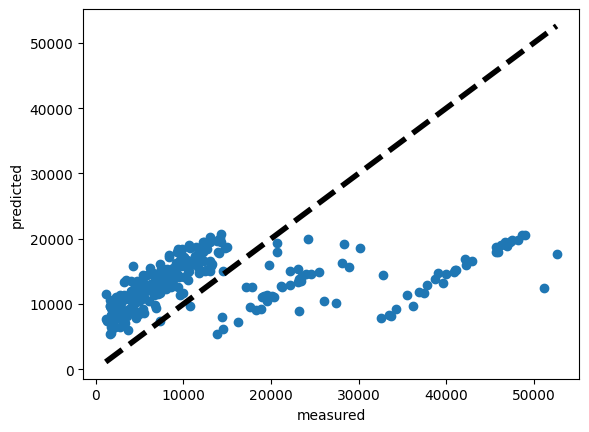

In [38]:
#3
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [39]:
#4
MAR = metrics.mean_absolute_error(y_test, y_pred)
MSR = metrics.mean_squared_error(y_test, y_pred)
RMSR = np.sqrt(MSR)

print("Mean Absolute Error:", MAR)
print("Mean Squared Error:", MSR)
print("Root Mean Squared Error:", RMSR)

Mean Absolute Error: 9016.00255819533
Mean Squared Error: 133189853.20376825
Root Mean Squared Error: 11540.790839616158


In [40]:
#partie 4 « Régression linière polynomial multiple cas de china GDP»:
#1

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('china_gdp.csv')
print(df.describe())
# Select features and target variable
X = df[['Year']]
y = df['Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Polynomial Regression
degree = 2  # You can change the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

             Year         Value
count    55.00000  5.500000e+01
mean   1987.00000  1.437042e+12
std      16.02082  2.500085e+12
min    1960.00000  4.668518e+10
25%    1973.50000  1.395123e+11
50%    1987.00000  3.074796e+11
75%    2000.50000  1.268748e+12
max    2014.00000  1.035483e+13


LinearRegression()

In [42]:
#2
# Linear Regression
print("Linear regression")
y_pred_linear = linear_regressor.predict(X_test)
df_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})
print(df_linear)

# Polynomial Regression
print("polynomial regression")
y_pred_poly = poly_regressor.predict(X_test_poly)
df_poly = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_poly})
print(df_poly)


Linear regression
          Actual     Predicted
45  2.268599e+12  3.944526e+12
33  4.428746e+11  2.396492e+12
40  1.205261e+12  3.299511e+12
26  2.988058e+11  1.493472e+12
11  9.856202e+10 -4.415713e+11
2   4.668518e+10 -1.602597e+12
32  4.249341e+11  2.267489e+12
43  1.649929e+12  3.686520e+12
46  2.729784e+12  4.073529e+12
30  3.589732e+11  2.009483e+12
4   5.906225e+10 -1.344591e+12
polynomial regression
          Actual     Predicted
45  2.268599e+12  4.210332e+12
33  4.428746e+11  9.175305e+11
40  1.205261e+12  2.612618e+12
26  2.988058e+11 -1.455611e+11
11  9.856202e+10 -2.954634e+11
2   4.668518e+10  1.007567e+12
32  4.249341e+11  7.269666e+11
43  1.649929e+12  3.532553e+12
46  2.729784e+12  4.568568e+12
30  3.589732e+11  3.845325e+11
4   5.906225e+10  6.277193e+11


In [43]:
#3

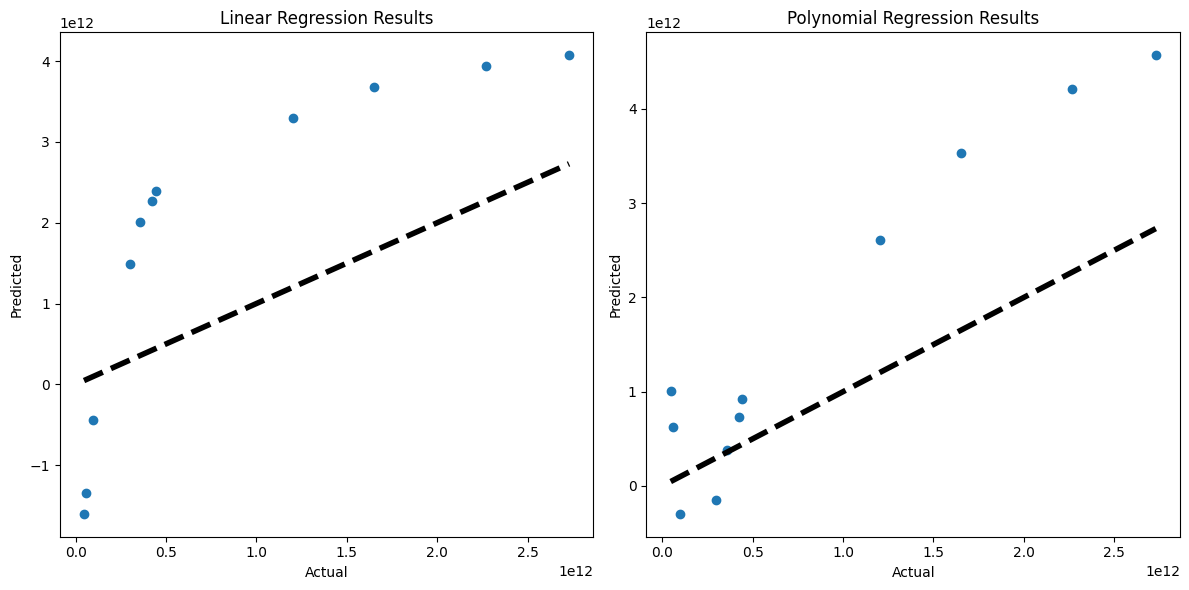

In [44]:
import matplotlib.pyplot as plt

# Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Results')

# Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression Results')

plt.tight_layout()
plt.show()

In [45]:
#4
from sklearn import metrics

# Linear Regression Metrics
linear_MSE = metrics.mean_squared_error(y_test, y_pred_linear)
linear_RMSE = np.sqrt(linear_MSE)
linear_MAE = metrics.mean_absolute_error(y_test, y_pred_linear)

print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", linear_MSE)
print("Root Mean Squared Error (RMSE):", linear_RMSE)
print("Mean Absolute Error (MAE):", linear_MAE)
print()

# Polynomial Regression Metrics
poly_MSE = metrics.mean_squared_error(y_test, y_pred_poly)
poly_RMSE = np.sqrt(poly_MSE)
poly_MAE = metrics.mean_absolute_error(y_test, y_pred_poly)

print("Polynomial Regression Metrics:")
print("Mean Squared Error (MSE):", poly_MSE)
print("Root Mean Squared Error (RMSE):", poly_RMSE)
print("Mean Absolute Error (MAE):", poly_MAE)

Linear Regression Metrics:
Mean Squared Error (MSE): 2.6811931196364024e+24
Root Mean Squared Error (RMSE): 1637434920733.1577
Mean Absolute Error (MAE): 1580448121034.8318

Polynomial Regression Metrics:
Mean Squared Error (MSE): 1.326631094098924e+24
Root Mean Squared Error (RMSE): 1151794727414.1013
Mean Absolute Error (MAE): 930970716433.7007
